In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the latest forbes stats data for the World's Largest Tech Companies In 2021.
forbes = pd.read_csv('./data-Sltmq.csv')
top_10 = forbes.head(10)

The above shows the top 10 Largest tech companies according to [forbes](https://www.forbes.com/sites/jonathanponciano/2021/05/13/worlds-largest-tech-companies-2021/?sh=1c36c00969bc)

Lets inspect each of the sites and investigate how nested their diversity page is.

### Companies Diversity Pages

In [3]:
apple_diversity_page = 'https://www.apple.com/diversity'
samsung_diversity_page = 'https://www.samsung.com/africa_en/sustainability/diversity-and-inclusion'
alphabet_diversity_page = 'https://diversity.google'
microsoft_diversity_page = 'https://www.microsoft.com/diversity'
tencent_diversity_page = np.nan
facebook_diversity_page = 'https://diversity.fb.com'
intel_diversity_page = 'https://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html'
ibm_diversity_page = 'https://www.ibm.com/impact/be-equal'
tmc_diversity_page = 'https://www.tsmc.com/static/english/careers/inclusive_workplace.htm'
oracle_diversity_page = 'https://www.oracle.com/corporate/careers/diversity-inclusion'

Add the diversity pages as a column in the forbes dataset

In [4]:
d_pages = [apple_diversity_page, samsung_diversity_page, alphabet_diversity_page, microsoft_diversity_page, 
          tencent_diversity_page, facebook_diversity_page, intel_diversity_page, ibm_diversity_page, tmc_diversity_page,
          oracle_diversity_page]

top_10['diversity_page'] = d_pages

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
# inspect
top_10

,Rank,Name,Country,Sales,Market Value,diversity_page
0,1,Apple,U.S.,$293.9 billion,$2.3 trillion,https://www.apple.com/diversity
1,2,Samsung Electronics,South Korea,$200.7 billion,$510.5 billion,https://www.samsung.com/africa_en/sustainabili...
2,3,Alphabet,U.S.,$182.4 billion,$1.5 trillion,https://diversity.google
3,4,Microsoft Corporation,U.S.,$153.3 billion,$2 trillion,https://www.microsoft.com/diversity
4,5,Tencent Holdings,China,$70 billion,$773.8 billion,NaN
5,6,Facebook,U.S.,$86 billion,$870.5 billion,https://diversity.fb.com
6,7,Intel Corporation,U.S.,$77.9 billion,$263.7 billion,https://www.intel.com/content/www/us/en/divers...
7,8,IBM,U.S.,$73.6 billion,$119.4 billion,https://www.ibm.com/impact/be-equal
8,9,Taiwan Semiconductor Manufacturing Co.,Taiwan,$48.1 billion,$558.1 billion,https://www.tsmc.com/static/english/careers/in...
9,10,Oracle Corporation,U.S.,$39.7 billion,$227.7 billion,https://www.oracle.com/corporate/careers/diver...


Since we're only trying to know how nested the diversity pages are, we'll drop other columns except for the `Name` and `diversity_page` columns.

In [6]:
top_10.drop(['Country', 'Sales', 'Market Value'], axis=1, inplace=True)

top_10

C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Rank,Name,diversity_page
0,1,Apple,https://www.apple.com/diversity
1,2,Samsung Electronics,https://www.samsung.com/africa_en/sustainabili...
2,3,Alphabet,https://diversity.google
3,4,Microsoft Corporation,https://www.microsoft.com/diversity
4,5,Tencent Holdings,NaN
5,6,Facebook,https://diversity.fb.com
6,7,Intel Corporation,https://www.intel.com/content/www/us/en/divers...
7,8,IBM,https://www.ibm.com/impact/be-equal
8,9,Taiwan Semiconductor Manufacturing Co.,https://www.tsmc.com/static/english/careers/in...
9,10,Oracle Corporation,https://www.oracle.com/corporate/careers/diver...


Next, we'll remove the `https://` from the pages links so we can count how many forward slashes actually appear in the page links

In [7]:
# check if type is string and remove 'https://' from strings
data = top_10['diversity_page'].apply(lambda x: x.replace('https://', '') if type(x) == str else x)

data

0                              www.apple.com/diversity
1    www.samsung.com/africa_en/sustainability/diver...
2                                     diversity.google
3                          www.microsoft.com/diversity
4                                                  NaN
5                                     diversity.fb.com
6    www.intel.com/content/www/us/en/diversity/dive...
7                          www.ibm.com/impact/be-equal
8    www.tsmc.com/static/english/careers/inclusive_...
9    www.oracle.com/corporate/careers/diversity-inc...
Name: diversity_page, dtype: object

In [8]:
# insert the modification back into the data
top_10['diversity_page'] = data

top_10

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rank,Name,diversity_page
0,1,Apple,www.apple.com/diversity
1,2,Samsung Electronics,www.samsung.com/africa_en/sustainability/diver...
2,3,Alphabet,diversity.google
3,4,Microsoft Corporation,www.microsoft.com/diversity
4,5,Tencent Holdings,NaN
5,6,Facebook,diversity.fb.com
6,7,Intel Corporation,www.intel.com/content/www/us/en/diversity/dive...
7,8,IBM,www.ibm.com/impact/be-equal
8,9,Taiwan Semiconductor Manufacturing Co.,www.tsmc.com/static/english/careers/inclusive_...
9,10,Oracle Corporation,www.oracle.com/corporate/careers/diversity-inc...


Next, we'll compute the diversity score of companies by counting the number of forward slashes in the the links. Diversity scores will be ranked from 0-10. Where 10 represents a very high level of diversity in the company and zero signifies that the company does not account for diversity. 

The higher the number of forward slashes, the lower the diversity score and vice versa.

Companies that dedicate an entirely different domain to their diversity page will score lower than those that have more forward slashes. This is because, dedicating a different domain to a diversity means the users cant easily access the diversity page from the normal company's site.

Companies that do no have a diversity page will score the zero diversity scores.

First let's count the forward slashes:

In [9]:
count = top_10['diversity_page'].apply(lambda x: x.count('/') if type(x) == str else x)

# check
count

0    1.0
1    3.0
2    0.0
3    1.0
4    NaN
5    0.0
6    6.0
7    2.0
8    4.0
9    3.0
Name: diversity_page, dtype: float64

In [10]:
# insert the counter back into the dataset
# insert the modification back into the data
top_10['counts'] = count

top_10

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rank,Name,diversity_page,counts
0,1,Apple,www.apple.com/diversity,1.0
1,2,Samsung Electronics,www.samsung.com/africa_en/sustainability/diver...,3.0
2,3,Alphabet,diversity.google,0.0
3,4,Microsoft Corporation,www.microsoft.com/diversity,1.0
4,5,Tencent Holdings,NaN,NaN
5,6,Facebook,diversity.fb.com,0.0
6,7,Intel Corporation,www.intel.com/content/www/us/en/diversity/dive...,6.0
7,8,IBM,www.ibm.com/impact/be-equal,2.0
8,9,Taiwan Semiconductor Manufacturing Co.,www.tsmc.com/static/english/careers/inclusive_...,4.0
9,10,Oracle Corporation,www.oracle.com/corporate/careers/diversity-inc...,3.0


Using the criteria given in the afore mentioned description we'll define diversity scores as follows:

- `missing` `Counts` will have a diversity score of `0` (Not Diverse)
- `0` `Counts` will have a diversity score of `1` (Barely Diverse)
- `1` `Counts` will have a diversity score of `10` (Greatly Diverse)
- `2` `Counts` will have a diversity score of `8` (Very Diverse)
- `3` `Counts` will have a diversity score of `6` (Diverse)
- `4` `Counts` will have a diversity score of `4` (Diverse)
- `6` `Counts` will have a diversity score of `2` (Barely Diversity)

Let's map the values:

In [11]:
top_10['diversity_score'] = top_10['counts'].map({np.nan: 0,
                                                  0.0: 1, 
                                                 1.0: 10,
                                                 2.0: 8,
                                                 3.0: 6,
                                                 4.0: 4,
                                                 6.0: 2
                                                 })

# check
top_10

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Rank,Name,diversity_page,counts,diversity_score
0,1,Apple,www.apple.com/diversity,1.0,10
1,2,Samsung Electronics,www.samsung.com/africa_en/sustainability/diver...,3.0,6
2,3,Alphabet,diversity.google,0.0,1
3,4,Microsoft Corporation,www.microsoft.com/diversity,1.0,10
4,5,Tencent Holdings,NaN,NaN,0
5,6,Facebook,diversity.fb.com,0.0,1
6,7,Intel Corporation,www.intel.com/content/www/us/en/diversity/dive...,6.0,2
7,8,IBM,www.ibm.com/impact/be-equal,2.0,8
8,9,Taiwan Semiconductor Manufacturing Co.,www.tsmc.com/static/english/careers/inclusive_...,4.0,4
9,10,Oracle Corporation,www.oracle.com/corporate/careers/diversity-inc...,3.0,6


In [12]:
# map diversity remarks to companies
top_10['diversity_remark'] = top_10['diversity_score'].map({10: 'Greatly Diverse',
                                                  0: 'Not Diverse', 
                                                 1: 'Barely Diverse',
                                                 2: 'Barely Diverse',
                                                 8: 'Very Diverse',
                                                 4: 'Diverse',
                                                 6: 'Diverse'
                                                 })

# sort the dataset based on diversity score
top_10 = top_10.sort_values('diversity_score', ascending=False)

# check
top_10

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rank,Name,diversity_page,counts,diversity_score,diversity_remark
0,1,Apple,www.apple.com/diversity,1.0,10,Greatly Diverse
3,4,Microsoft Corporation,www.microsoft.com/diversity,1.0,10,Greatly Diverse
7,8,IBM,www.ibm.com/impact/be-equal,2.0,8,Very Diverse
1,2,Samsung Electronics,www.samsung.com/africa_en/sustainability/diver...,3.0,6,Diverse
9,10,Oracle Corporation,www.oracle.com/corporate/careers/diversity-inc...,3.0,6,Diverse
8,9,Taiwan Semiconductor Manufacturing Co.,www.tsmc.com/static/english/careers/inclusive_...,4.0,4,Diverse
6,7,Intel Corporation,www.intel.com/content/www/us/en/diversity/dive...,6.0,2,Barely Diverse
2,3,Alphabet,diversity.google,0.0,1,Barely Diverse
5,6,Facebook,diversity.fb.com,0.0,1,Barely Diverse
4,5,Tencent Holdings,NaN,NaN,0,Not Diverse


sort the dataset in descending to aid a more interpretative chart

### Create a Chart that shows the diversity score of top 10 tech companies

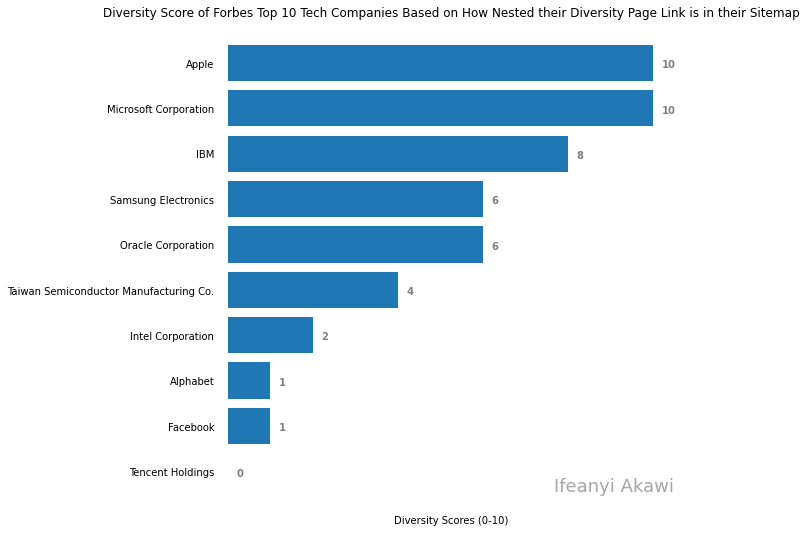

In [13]:
# figure size
fig, ax = plt.subplots(figsize=(8, 9))

# horizontal barchart
ax.barh(top_10['Name'], top_10['diversity_score'])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xlabel('Diversity Scores (0-10)')
    
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title("Diversity Score of Forbes Top 10 Tech Companies Based on How Nested their Diversity Page Link is in their Sitemap")

# Add Text watermark
fig.text(0.9, 0.15, 'Ifeanyi Akawi', fontsize = 18,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

# Hide x label
ax.axes.xaxis.set_ticks([])

# save image
plt.savefig("Tech Diversity Chart")

# Show Plot
plt.show()